# Team

0228903 Juan Pablo Enríquez Pedroza

0229261 Ulises Gallardo Rodríguez

# Imports and data

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from  IPython.display import clear_output

# Differential_evolution with Image

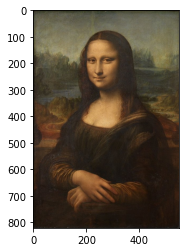

In [66]:
img_obj = cv2.imread("lisa.jpg")
img_obj = cv2.cvtColor(img_obj, cv2.COLOR_BGR2RGB)

rows,cols,channels = img_obj.shape  
Img = np.zeros((rows, cols, 3), np.uint8)
plt.imshow(img_obj)
plt.show()


In [67]:
def draw_circle(Img, center_coordinates, color, radius, alpha):
    overlay = Img.copy()
    thickness = -1
    image = cv2.circle(Img, center_coordinates, radius, color, thickness)
    image_new  = cv2.addWeighted(overlay, alpha, image,alpha, 0)
    return image_new

In [68]:
def f(P):
    global img_obj    
    global Img
    img_aux = Img.copy()
    
    center = (int(P[0]),int(P[1]))
    color = (int(P[3]),int(P[4]),int(P[5]))
    r = int(P[2])
    alpha = P[6]
    img_aux = draw_circle(img_aux, center,color,r,alpha)

    return np.sum(np.abs(img_obj-img_aux))

In [69]:
count_img = 0
def plot(P):
    clear_output(wait=True)
    global Img
    global count_img
    Img = draw_circle(Img, (int(P[0]),int(P[1])),(int(P[3]),int(P[4]),int(P[5])),int(P[2]),P[6]) 
    print("Error",f(P))
    cv2.imwrite('Gif/Img01/savedimage'+str(count_img)+'.png', cv2.cvtColor(Img, cv2.COLOR_BGR2RGB))
    plt.imshow(Img)
    plt.axis("off")
    plt.show()
    count_img+=1
    

In [70]:
bounds = [[0,cols],   
        [0,rows],
        [1,cols/4],             
        [0,255],
        [0,255],
        [0,255],
        [0.1,1]]     

Error 28394939


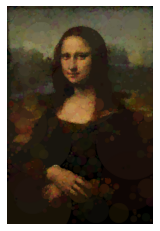

rep:  2647 / 5324.6811264777925


KeyboardInterrupt: 

In [71]:
from differential_evolution import differential_evolution
res =  differential_evolution(f, plot, 50, bounds, popsize=50,Cr=0.75, rep=((min(cols,rows)/2) *  np.log2(max(cols,rows)*max(cols,rows))))